Optimizing urban road traffic using AI - assignment

Termin: 22 czerwca 2025 23:59
Instrukcje
Download the dataset from https://drive.google.com/file/d/1m5xgNXp3vv5zzH4JHfE9983cLiSR3IPp/view

In the file, you have 105336 rows. In each row, the first 21 elements are offsets at 21 intersections in Warsaw (a part of the Ochota district), while the last element is the total waiting time at red lights for all cars during a simulation of 10 minutes of realistic traffic (it was calculated using the Traffic Simulation Framework tool). The offsets are times (in seconds) from the start of the simulation to the first transition (of a selected signal state at the given intersection) from the red signal state to the green signal state. The values of the offsets are integers from the set {0,1,2,...,119}. The total wait times at red signals are also integers.

Your task is to implement a pipeline for:

1) Reading the data.

2) Splitting the dataset into a training set (first 85336 rows) and a test set (last 20000 rows).

3) Preprocessing the data (e.g., you can normalize the inputs and outputs).

4) Training at least 1 machine learning model (e.g., a feed-forward neural network, XGBoost, or LightGBM) to predict the total wait time at red signals based on the 21 offsets.

5) Calculating the MAPE (Mean Absolute Percentage Error) of the trained model(s) on the test set and presenting the results.

6) Optimizing the hyperparameters of your model, if needed.

7) Presenting the results, e.g., you can visualize how the MAPE or loss function changes in iterations of training.



It should be possible to get a MAPE below 2%, but it may take some time and may require optimizing the parameters. 

The code should be prepared as a Jupyter notebook. If you need a GPU, you can use Google Colab.



Questions: send an email to pawel.gora@qaif.org

Submission: send the Jupyter notebook file with the code to pawel.gora@qaif.org by 22.06.2025.

In [7]:
# !pip install pandas scikit-learn xgboost lightgbm


1) Reading the data.

In [2]:
# import pandas as pd

# df = pd.read_csv("ochota100k.csv")

In [1]:
import pandas as pd

file_path = "../ochota100k.csv"
df = pd.read_csv(file_path, header=None)
print(df.head())

    0   1   2    3   4   5    6   7   8    9   ...   12   13   14   15   16  \
0   81  14  58  108  83  60   82  61  64   94  ...   28   87   73   69   25   
1   81  92  16   44  95  64  110  98  95  105  ...   42    5   40  105  118   
2   75  20  66  104  20  65   80  97   2   81  ...  119  115  118   64   68   
3   30  42  65  108  67  81   85  32  83   48  ...  107   79   44   90    6   
4  117  20  52   40  25  36   87  78  99   70  ...   92   21   34  102   37   

   17  18   19  20     21  
0   7  77   95   5  49082  
1  48  40   62  45  51223  
2  46  45   43  18  51461  
3  25  46  102  62  45119  
4  46  11    9  66  50660  

[5 rows x 22 columns]


In [2]:
columns_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", 'time']
df.columns = columns_names
df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,time
0,81,14,58,108,83,60,82,61,64,94,...,28,87,73,69,25,7,77,95,5,49082
1,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
2,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
3,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
4,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660


2) Splitting the dataset into a training set (first 85336 rows) and a test set (last 20000 rows).

In [3]:
train_df = df.iloc[:85336]
test_df = df.iloc[-20000:]

3. Preprocessing the data (e.g., you can normalize the inputs and outputs).

In [4]:
X_train=train_df.drop(['time'], axis=1)
y_train=train_df['time']
X_test=test_df.drop(['time'], axis=1)
y_test=test_df['time']

4) Training at least 1 machine learning model (e.g., a feed-forward neural network, XGBoost, or LightGBM) to predict the total wait time at red signals based on the 21 offsets.

In [8]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
# import lightgbm as lgb

# evals_result = {}

# # Dane
# train_data = lgb.Dataset(X_train, label=y_train)
# valid_data = lgb.Dataset(X_test, label=y_test)

# # Parametry modelu
# params = {
#     'objective': 'regression',
#     'metric': 'mape',
#     'learning_rate': 0.05,
#     'num_leaves': 31,
#     'verbose': -1
# }

# # Trening z callbackami
# model1 = lgb.train(
#     params=params,
#     train_set=train_data,
#     num_boost_round=200,
#     valid_sets=[train_data, valid_data],
#     valid_names=['train', 'valid'],
#     callbacks=[
#         lgb.early_stopping(stopping_rounds=20),
#         lgb.record_evaluation(evals_result),
#         lgb.log_evaluation(period=10)  # Wyświetla logi co 10 iteracji
#     ]
# )


In [9]:
# import matplotlib.pyplot as plt

# # Pobierz metryki MAPE dla obu zbiorów
# train_mape = evals_result['train']['mape']
# valid_mape = evals_result['valid']['mape']

# # Tworzenie wykresu
# plt.figure(figsize=(10, 6))
# plt.plot(train_mape, label='Train MAPE')
# plt.plot(valid_mape, label='Valid MAPE')
# plt.xlabel('Boosting Round')
# plt.ylabel('MAPE')
# plt.title('MAPE w trakcie treningu LightGBM')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [9]:
y_pred = model.predict(X_test)

In [10]:
len(y_test) == len(y_pred)

True

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}")

RMSE: 5137887.50
MAE: 1817.37
R² score: 0.51


5) Calculating the MAPE (Mean Absolute Percentage Error) of the trained model(s) on the test set and presenting the results.

In [12]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

MAPE: 3.72%


In [13]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred) * 100, "%")

MAE: 1817.3677978515625
RMSE: 5137887.5
R²: 0.5091012716293335
MAPE: 3.7229258567094803 %


6) Optimizing the hyperparameters of your model, if needed.

In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best params (XGB):", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params (XGB): {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Przekształć dane do formatu DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

# Parametry modelu
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mape',  # lub 'mape', ale tylko w nowszych wersjach
    'learning_rate': 0.2,
    'max_depth': 7,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Listy walidacyjne
evals = [(dtrain, 'train'), (dvalid, 'valid')]
evals_result = {}

# Trening z early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=10
)

[0]	train-mape:0.05255	valid-mape:0.05253
[10]	train-mape:0.04443	valid-mape:0.04522
[20]	train-mape:0.03808	valid-mape:0.03966
[30]	train-mape:0.03358	valid-mape:0.03582
[40]	train-mape:0.02930	valid-mape:0.03211
[50]	train-mape:0.02626	valid-mape:0.02942
[60]	train-mape:0.02437	valid-mape:0.02789
[70]	train-mape:0.02313	valid-mape:0.02698
[80]	train-mape:0.02174	valid-mape:0.02585
[90]	train-mape:0.02067	valid-mape:0.02509
[100]	train-mape:0.01953	valid-mape:0.02421
[110]	train-mape:0.01885	valid-mape:0.02375
[120]	train-mape:0.01799	valid-mape:0.02307
[130]	train-mape:0.01735	valid-mape:0.02263
[140]	train-mape:0.01672	valid-mape:0.02216
[150]	train-mape:0.01629	valid-mape:0.02196
[160]	train-mape:0.01576	valid-mape:0.02160
[170]	train-mape:0.01543	valid-mape:0.02147
[180]	train-mape:0.01508	valid-mape:0.02134
[190]	train-mape:0.01475	valid-mape:0.02121
[199]	train-mape:0.01441	valid-mape:0.02105


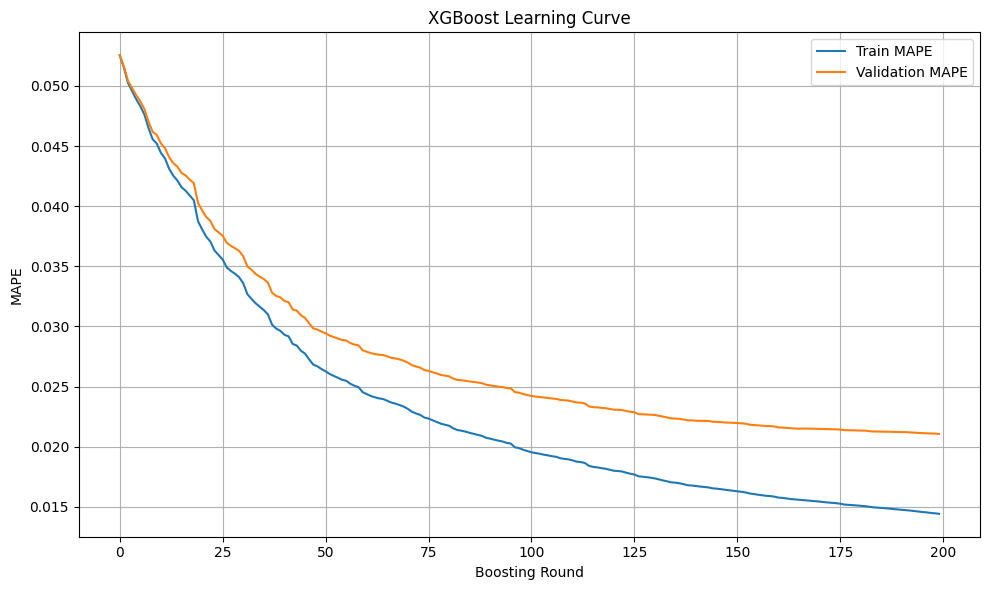

In [16]:
train_mae = evals_result['train']['mape']
valid_mae = evals_result['valid']['mape']

plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='Train MAPE')
plt.plot(valid_mae, label='Validation MAPE')
plt.xlabel('Boosting Round')
plt.ylabel('MAPE')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
y_pred = model.predict(dvalid)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

MAPE: 2.11%


In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import numpy as np

# Definicja modelu
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definicja siatki hiperparametrów (większe zakresy)
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300]
}

# Definicja metryki MAPE do optymalizacji (mniejsza wartość lepsza)
def mape_scorer(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

scorer = make_scorer(mape_scorer, greater_is_better=False)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Uruchomienie tuningu
grid_search.fit(X_train, y_train)

# Najlepsze parametry i wynik
print("Best parameters:", grid_search.best_params_)
print("Best MAPE:", -grid_search.best_score_)


Fitting 3 folds for each of 1500 candidates, totalling 4500 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
Best MAPE: 0.02112021359304587


7) Presenting the results, e.g., you can visualize how the MAPE or loss function changes in iterations of training.

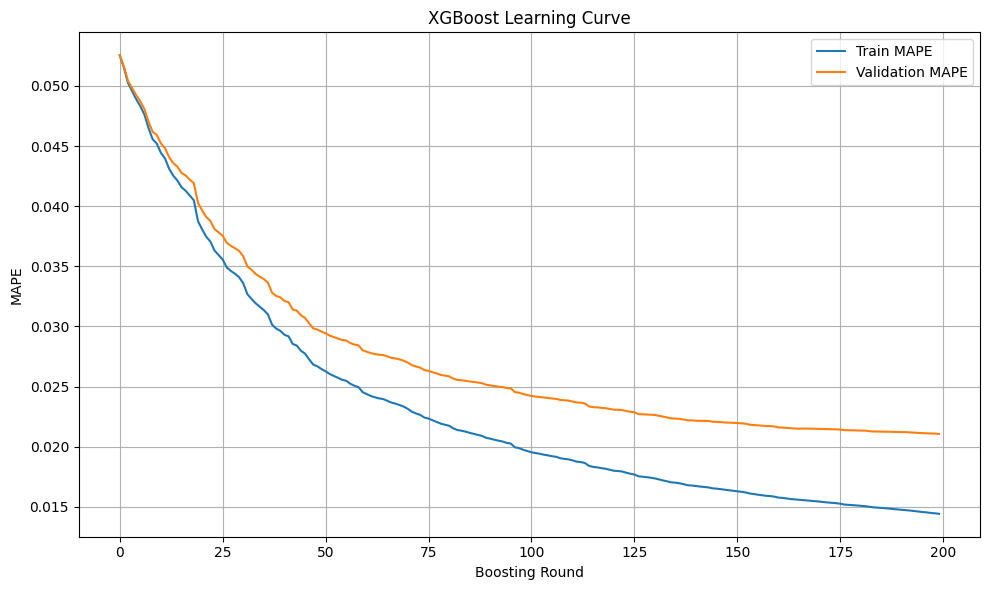

In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='Train MAPE')
plt.plot(valid_mae, label='Validation MAPE')
plt.xlabel('Boosting Round')
plt.ylabel('MAPE')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()